In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
import glob
import numpy as np
import time
from datetime import datetime
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
import os

In [2]:
def splot(df, x, y, hue=None, legend=True, ylog=False, xlog=False):
    f, ax = plt.subplots(figsize=(6, 6))
    sb.set_theme(style="whitegrid")
    if ylog:
        ax.set(yscale="log")
    if xlog:
        ax.set(xscale="log")
    sb.scatterplot(x=x, y=y, hue=hue, ax=ax, data=df)
    ax.legend(title=hue, loc="center left", bbox_to_anchor=(1, 0.5))
    if ax.get_legend() and not legend:
        ax.get_legend().remove()

In [3]:
def get_sec(time):
    h,m,s = time.split(":")
    return int(h) * 3600 + int(m) * 60 + int(s)

def read_log_stats(file):
    txt = ""
    with open(file, "r") as f:
        txt = f.read()
    
    cluster = txt.split(" id=")[1].split("\n")[0]
    threads = txt.split("Threads: ")[1].split("\n")[0]
    cpu_time = get_sec(txt.split("CPU Utilized: ")[1].split("\n")[0])
    mem = float(txt.split("Memory Utilized: ")[1].split()[0])
    mem_unit = txt.split("Memory Utilized: ")[1].split()[1]
    mem_mb = mem * 1000 if mem_unit == "GB" else mem
    # print(cluster)
    # print(threads)
    # print(start)
    # print(end)
    # print(duration.total_seconds())
    return (cluster, int(cpu_time), mem_mb)

def read_fasta_stats(file):
    fasta = ""
    cumlen = 0
    seqcount = 0
    reflen = 0
    with open(file) as f:
        fasta = ("\n" + f.read()).split("\n>")[1:]
    for seq in fasta:
        seqcount += 1
        cumlen += len(seq.split("\n")[1])
        if reflen == 0:
            reflen = cumlen
    return (cumlen, seqcount, reflen)

def benchmark(logdir, fasta_dir):
    data = []
    logs = sorted(glob.glob(os.path.join(logdir, "*.out")))
    for log in logs:
        (cluster, duration, mem_mb) = read_log_stats(log)
        (cumlen, seqcount, reflen) = read_fasta_stats(os.path.join(fasta_dir, cluster + ".clean.fasta"))
        data.append((cluster, duration/60, mem_mb, cumlen, seqcount, cumlen / seqcount, reflen))
    return pd.DataFrame(data, columns=["cluster", "cpu_time_min", "mem_mb", "sum_length", "cluster_size", "avg_sequence_len", "reference_len"]).set_index("cluster").rename_axis(index=None)



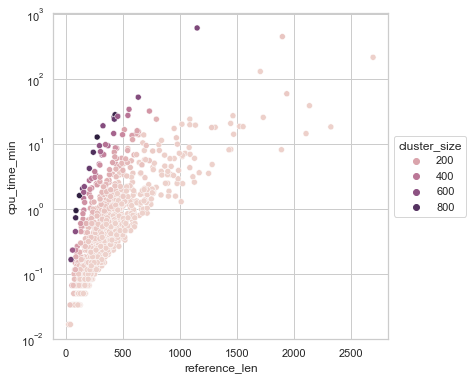

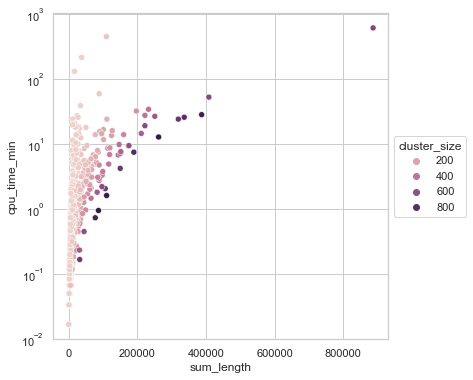

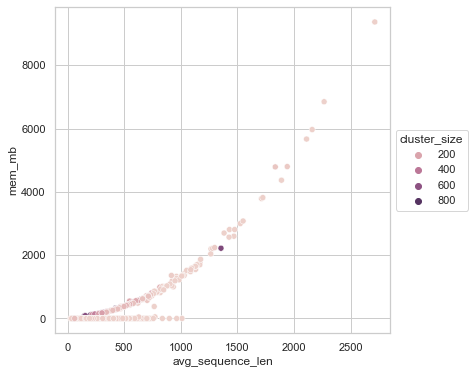

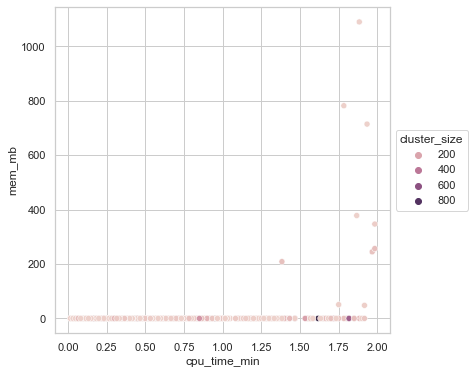

In [10]:
df = benchmark("./../data/benchmark/stats", "./../data/benchmark/clean")
splot(df, "reference_len", "cpu_time_min", hue="cluster_size", ylog=True)
splot(df, "sum_length", "cpu_time_min", hue="cluster_size", ylog=True)
splot(df, "avg_sequence_len", "mem_mb", hue="cluster_size")
df2 = df[df["cpu_time_min"] < 2]
splot(df2, "cpu_time_min", "mem_mb", hue="cluster_size")


In [8]:
df2[df2["avg_sequence_len"] > 800]

,cpu_time_min,mem_mb,sum_length,cluster_size,avg_sequence_len,reference_len
cluster_883,1.883333,1090.0,10084,11,916.727273,905
cluster_897,1.650000,0.0,10876,13,836.615385,835
cluster_262,1.583333,0.0,11677,13,898.230769,900
cluster_677,1.300000,0.0,10101,10,1010.100000,1012
cluster_531,1.583333,0.0,10597,11,963.363636,962


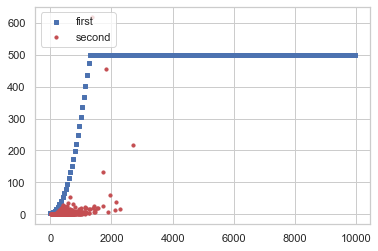

In [14]:
t = []
a = []
for tt in range(0, 10000, 50):
    t.append(tt)
    a.append(min(tt * tt / 1000 * 0.3 + 5, 500))

fig = plt.figure()
ax1 = fig.add_subplot(111)
# ax1.set_yscale("log")
ax1.scatter(t, a, s=10, c='b', marker="s", label='first')
ax1.scatter(df["avg_sequence_len"], df["cpu_time_min"], s=10, c='r', marker="o", label='second')
plt.legend(loc='upper left');
plt.show()

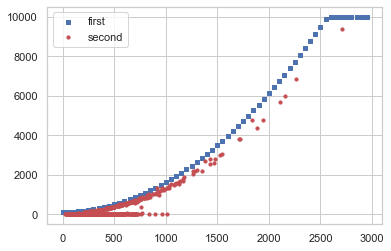

In [7]:
t = []
a = []
for tt in range(0, 3000, 50):
    t.append(tt)
    a.append(int(min(tt * tt * 0.0015 + 128, 10000)))
fig = plt.figure()
ax1 = fig.add_subplot(111)
# ax1.set_yscale("log")
ax1.scatter(t, a, s=10, c='b', marker="s", label='first')
ax1.scatter(df["avg_sequence_len"], df["mem_mb"], s=10, c='r', marker="o", label='second')
plt.legend(loc='upper left');
plt.show()

In [8]:
k = 60
f"{int(k/60):02}:{int(k%60):02}:00"

'01:00:00'